# 定义问题

根据已归类的鲜花图片，使用CNN建立鲜花识别模型，给未归类的图片自动贴标签

Kaggle 网站是一个在线的 Jupyter Notebook 平台，也是数据科学爱好者之间最佳的交流场所。在这个网站上，你可以找到各种数据集、源代码和课程资料等资源。我们计划将这个项目在 Kaggle 网站上运行。

线上版本：https://www.kaggle.com/code/abrahamcheng/rnn-network/notebook

# 数据预处理

在 Kaggle 网站上，有一个公开的数据集可供使用，其中包含各类花朵图片。我们可以将该数据集作为项目的数据源。考虑到花朵图片数据集较大，我们无需下载它，而是可以直接在网站中创建 Notebook 来完成对花朵图片的分类工作。

In [1]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
import os # 导入OS
import cv2 # 导入Open CV工具箱

print(os.listdir('../input/flowers-recognition/flowers')) #打印目录结构
daisy_dir='../input/flowers-recognition/flowers/daisy' #雏菊目录
rose_dir='../input/flowers-recognition/flowers/rose' #玫瑰目录
sunflower_dir='../input/flowers-recognition/flowers/sunflower' #向日葵目录
tulip_dir='../input/flowers-recognition/flowers/tulip' #郁金香目录

X = [] #初始化
y_label = [] #初始化
imgsize = 150 #图片大小
# 定义一个函数读入花的图片
def training_data(label,data_dir):
    print ("正在读入：", data_dir) 
    for img in os.listdir(data_dir): #目录
        path = os.path.join(data_dir,img) #目录+文件名
        img = cv2.imread(path,cv2.IMREAD_COLOR) #读入图片
        img = cv2.resize(img,(imgsize,imgsize)) #设定图片像素维度
        X.append(np.array(img)) #X特征集
        y_label.append(str(label)) #y标签，即花的类别
# 读入目录中的图片
training_data('daisy',daisy_dir) #读入雏菊
training_data('rose',rose_dir) #读入玫瑰
training_data('sunflower',sunflower_dir) #读入向日葵
training_data('tulip',tulip_dir) #读入郁金香

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
正在读入： ../input/flowers-recognition/flowers/daisy
正在读入： ../input/flowers-recognition/flowers/rose
正在读入： ../input/flowers-recognition/flowers/sunflower
正在读入： ../input/flowers-recognition/flowers/tulip


这段代码的目的是读取一个包含四种花（雏菊、玫瑰、向日葵和郁金香）的图片数据集，并对图片进行预处理，以便后续进行机器学习任务。

首先，我们导入需要的库：
1. Numpy：用于进行数组操作和数学计算。
2. Pandas：用于数据处理和分析。
3. os：用于处理文件和目录操作。
4. OpenCV（cv2）：用于处理图像和计算机视觉任务。

然后，我们定义了四个变量（daisy_dir、rose_dir、sunflower_dir、tulip_dir）分别存储四种花的图片所在目录。

接下来，我们初始化两个空列表 X 和 y_label 分别用于存储处理后的图片数据和对应的标签。

我们将 imgsize 设置为 150，用于稍后调整图像大小。

接着，我们定义了一个名为 `training_data` 的函数，该函数用于读取指定目录下的图片并进行预处理（读入图片、调整图片大小）。该函数接受两个参数：标签（label）和数据目录（data_dir）。函数首先打印所处理的数据目录。然后，针对数据目录中的每张图片，读取图片并调整大小。将处理后的图片数据添加到列表 X 中，同时将对应的标签添加到 y_label 中。

最后，我们分别对四种花的数据目录调用函数 `training_data`， 读入图片数据并添加到 X 和 y_label 列表中。

经过这段代码的执行，我们会得到包含四种花图片的预处理数据集（X 列表）和对应的类别标签（y_label 列表），为后续的机器学习任务做好准备。

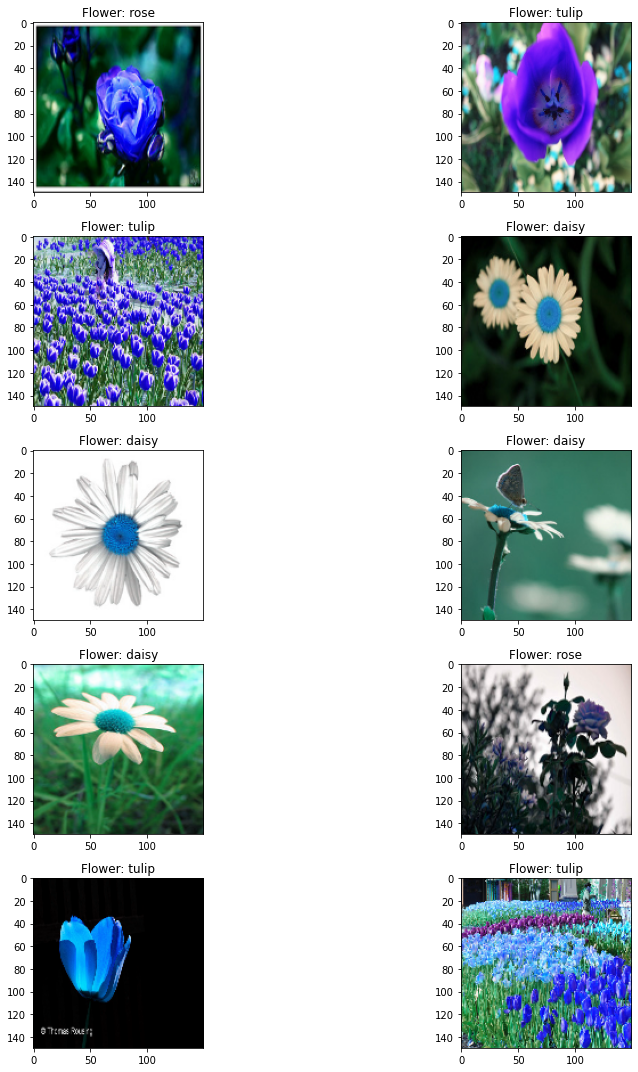

In [2]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张漂亮的花朵图片吧
fig,ax=plt.subplots(5,2) #画布
fig.set_size_inches(15,15) #大小
for i in range(5):
    for j in range (2):
        r=rdm.randint(0,len(X)) #随机选择图片
        ax[i,j].imshow(X[r]) #显示图片
        ax[i,j].set_title('Flower: '+y_label[r]) #花的类别
plt.tight_layout() #绘图

这段代码的主要目的是从预处理过的花朵图片数据集 X 中随机选择并显示 10 张花朵图片。同时，在每张图片上方显示对应的花朵类别。

首先，我们导入需要的库：

1. matplotlib.pyplot：用于可视化，绘制图形。
2. random：用于生成随机数。

接下来，我们创建一个 5x2 的画布，用于显示 10 张图片。我们设置画布的大小为 15x15 英寸。

我们使用两层嵌套的循环（对应 5 行 2 列的坐标位置），共执行 10 次。 在循环内部：

1. 我们使用 random.randint() 函数生成一个介于 0 到 len(X)-1 之间的随机整数 r，用于从 X 数据集中随机选择一张花朵图片。
2. 使用 ax[i,j].imshow(X[r]) 来在坐标为 (i, j) 的子图上显示选中的图片。
3. 使用 ax[i,j].set_title() 在每张图片上方添加对应的花朵类别。

最后，我们使用 plt.tight_layout() 函数优化图像的布局和间距，然后呈现图像。

执行完这段代码后，你将看到一个 5x2 的图片矩阵，共显示了 10 张随机选取的花朵图片及其类别名称。

## 构建特征和标签

在下面的代码中，我们使用 LabelEncoder 对标签 y 进行编码，并将特征集 X 转换为张量数组。

In [3]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from tensorflow.keras.utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y,4) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组

这段代码主要用于对 y_label 进行预处理，包括标签编码和 One-hot 编码。同时，将列表 X 转换为张量数组。

首先，我们导入所需库：
1. sklearn.preprocessing.LabelEncoder：用于将类别标签转换为整数编码。
2. tensorflow.keras.utils.to_categorical：用于将整数编码转换为 One-hot 编码。

接着，我们创建一个 LabelEncoder 对象，并调用 fit_transform() 方法对 y_label 进行标签编码。标签编码的含义是为每个类别（雏菊、玫瑰、向日葵、郁金香）分配一个整数。例如，雏菊为 0，玫瑰为 1，向日葵为 2，郁金香为 3。经过标签编码处理，y_label 将被转换为对应整数编码的列表。

然后，我们使用 to_categorical() 函数将整数编码的列表 y 转换为 One-hot 编码。One-hot 编码是一种表示类别变量的方法，其中每个类别都由一个二进制向量表示，向量中的一个元素为 1，而其他元素为 0。例如，雏菊（0）表示为 [1, 0, 0, 0]，玫瑰（1）表示为 [0, 1, 0, 0]，向日葵（2）表示为 [0, 0, 1, 0]，郁金香（3）表示为 [0, 0, 0, 1]。

最后，我们将列表 X 转换为一个 Numpy 数组（张量）。这样，我们就得到了预处理后的 X 和 y，它们现在可以用于训练机器学习模型了。

In [4]:
y #看一看y张量什么样，这是分类标签

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

## 特征工程

深层神经网络的优势在于能够自动提取非结构化数据集中的复杂特征，无需人工干预。因此，不需要进行繁琐的特征工程处理。

然而，由于神经网络对小范围数值更敏感，在这里我们只需将0-255的RGB像素值归一化到0-1之间即可。这一步骤至关重要，否则神经网络可能无法正常运行。

In [5]:
X = X/255 # 将X张量归一化

这行代码的目的是对 X 张量中的所有像素值进行归一化。归一化是将数据缩放到特定范围（在本例中是 0 到 1）的预处理过程，这样可以使神经网络模型更容易学习特征并避免梯度消失或爆炸的问题。

对于图像数据，每个像素的值介于 0 到 255 之间。通过将 X 张量中的每个像素值除以 255，我们将数据范围缩小到 0 到 1 之间。归一化后，每个像素值都将以浮点数形式表示。这可以帮助机器学习模型更高效地学习图像中的特征。

## 拆分数据集

In [6]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, #拆分数据集
                             test_size=0.2,random_state=1)

这段代码用于将处理过的数据集（X 和 y）拆分为训练集和测试集。拆分数据集是为了评估模型训练后的性能以及预防过拟合问题。

首先，我们从 sklearn.model_selection 中导入 train_test_split 函数，这是一个用于拆分数据集的实用工具。

接下来，我们使用 train_test_split 函数将 X 和 y 分为训练集（X_train、y_train）和测试集（X_test、y_test）， 并指定以下参数：

1. test_size：用于设置测试集大小。在本例中，我们设置为 0.2，表示测试集占整个数据集的 20%。
2. random_state：用于控制随机数生成器的种子。设置一个固定的值（如 1）可以确保每次运行代码时，训练集和测试集的分割都相同，这有助于重现结果。

如此一来，我们就得到了分开的训练集和测试集，在接下来的机器学习过程中，可以用训练集对模型进行训练，并使用测试集对模型的准确性和泛化能力进行评估。

# 训练模型

就的鲜花分类所属图像分类和识别问题来说，深度学习中的卷积神经网络 CNN 是首选。


在传统机器学习领域，sklearn 是主要的工具包。然而，在深度学习领域，TensorFlow 和 PyTorch 是两个主要的框架。这两个框架都是开源项目，一个由 Google 开发，另一个由 Facebook 开发。PyTorch 因其友好的编辑开发环境和支持快速、动态训练而越来越受到学术界和研究型开发者的欢迎。与此相反，TensorFlow 可以直接部署机器学习模型，并能够快速地开发和构建 AI 相关产品，因此仍然在工业界保持着霸主地位。

另外，TensorFlow 的另一个优势是内置了简单易用且功能强大的高级 API - Keras。Keras 封装了 TensorFlow 的底层深度学习功能，并被广泛认为是初学者进入深度学习领域最佳选择之一。因此，在下面我们将使用 Keras 来搭建神经网络模型。


## 建立模型

在 Kaggle 的 Notebook 中，我们可以直接使用 Tensorflow 和 Keras 来建立卷积神经网络模型，无需进行 pip install。只需调用它们的 API，即可搭建网络模型。

In [7]:
from tensorflow.keras import layers # 导入所有层 行1
from tensorflow.keras import models # 导入所有模型 行2
cnn = models.Sequential() # 贯序模型 行3
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 输入卷积层 行4
                        input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行5
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积层 行6
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行7
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行8
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行9
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行10
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行11
cnn.add(layers.Flatten()) # 展平层 行12
cnn.add(layers.Dense(512, activation='relu')) # 全连接层 行13
cnn.add(layers.Dense(4, activation='softmax')) # 分类输出层 行14
cnn.compile(loss='categorical_crossentropy', # 损失函数 行15
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标

这段Python代码使用TensorFlow的Keras库构建了一个简单的卷积神经网络（CNN）模型。以下是每一行代码的解释：

1. `from tensorflow.keras import layers`：从TensorFlow的Keras库中导入所有层。
2. `from tensorflow.keras import models`：从TensorFlow的Keras库中导入所有模型。
3. `cnn = models.Sequential()`：创建一个贯序模型（Sequential model），它是Keras模型的一种，可以通过堆叠多个层（layers）来构建。
4. `cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))`：向模型中添加一个具有32个过滤器（filters）、3x3大小的卷积核和ReLU激活函数的二维卷积层（Conv2D layer）。输入形状为（150，150，3），表示输入图像的高度和宽度分别为150像素，3个通道（例如彩色图像的RGB通道）。
5. `cnn.add(layers.MaxPooling2D((2, 2)))`：向模型中添加一个2x2大小的最大池化层（MaxPooling2D layer），用于降低空间维度。
6. `cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))`：添加另一个具有64个过滤器、3x3卷积核和ReLU激活函数的二维卷积层。
7. `cnn.add(layers.MaxPooling2D((2, 2)))`：添加另一个2x2大小的最大池化层。
8. `cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))`：添加具有128个过滤器、3x3卷积核和ReLU激活函数的二维卷积层。
9. `cnn.add(layers.MaxPooling2D((2, 2)))`：添加另一个2x2大小的最大池化层。
10. `cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))`：添加另一个具有128个过滤器、3x3卷积核和ReLU激活函数的二维卷积层。
11. `cnn.add(layers.MaxPooling2D((2, 2)))`：添加另一个2x2大小的最大池化层。
12. `cnn.add(layers.Flatten())`：添加一个展平层（Flatten layer），将多维输入展平为一维向量，以便将其输入到全连接层。
13. `cnn.add(layers.Dense(512, activation='relu'))`：添加一个具有512个神经元和ReLU激活函数的全连接层（Dense layer）。
14. `cnn.add(layers.Dense(4, activation='softmax'))`：添加一个具有4个神经元和Softmax激活函数的全连接层，用于输出分类结果。
15. `cnn.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['acc'])`：编译模型，设置损失函数为类别交叉熵（categorical_crossentropy），优化器为RMSprop，评估指标为准确率（accuracy）。

总之，这段代码定义了一个卷积神经网络模型，用于图像分类任务。模型包含多个卷积层、最大池化层、全连接层和一个输出层。

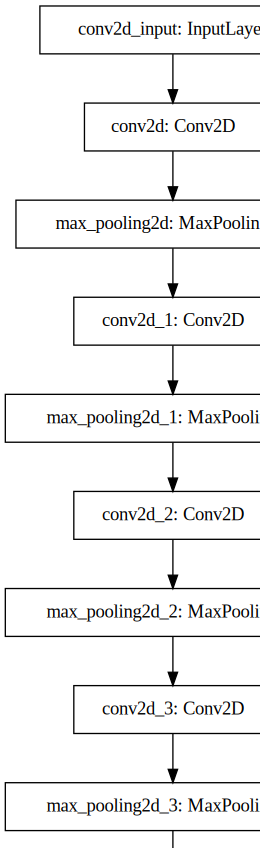

In [8]:
from IPython.display import SVG # 实现神经网络结构的图形化显示
from tensorflow.keras.utils import model_to_dot # 导入model_to_dot工具
SVG(model_to_dot(cnn).create(prog='dot', format='svg')) # 绘图

这段代码用于将卷积神经网络（CNN）模型的结构图形化显示。这可以帮助你更直观地查看和理解模型的各个层次及其连接。

1. 首先，我们从 IPython.display 包中导入 SVG 函数，这个函数可以将 SVG 格式的内容显示在 Jupyter Notebook 中。

2. 接下来，我们从 TensorFlow 的 Keras 工具包中导入 model_to_dot 函数。这个函数能将 Keras 模型转换为一个表示模型结构的 pydot.Dot 对象。

然后，我们使用 model_to_dot 函数（将 cnn 作为参数）将卷积神经网络结构转换为一个 pydot.Dot 对象。

3. 接着，我们调用 pydot.Dot 对象的 create 方法，使用 'dot' 程序（Graphviz 的一部分）并指定输出格式 'svg'，将 Dot 对象转换为 SVG 格式的图片。

4. 最后，我们将生成的 SVG 格式的字符串传递给 IPython.display 中的 SVG 函数，使 SVG 图像能够在 Jupyter Notebook 中显示。

这样我们就得到了代表卷积神经网络结构的图形，可以更直观地查看和理解模型的各个层次及其连接。

## 训练模型


在模型构建完成后，我们使用熟悉的 fit 语句进行训练。

在训练过程中，我们还使用了 validation_split 参数。它可以自动将训练集的一部分拆分出来作为验证集，在每个训练轮次中计算训练集和验证集上的损失和预测准确率。

In [9]:
# 训练网络并把训练过程信息存入history对象
history = cnn.fit(X_train,y_train, #训练数据
                  epochs=30, #训练轮次（梯度下降）
                  validation_split=0.2) #训练的同时进行验证

Epoch 1/30
66/66 [==============================] - 60s 892ms/step - loss: 1.8642 - acc: 0.3379 - val_loss: 1.0995 - val_acc: 0.5602
Epoch 2/30
66/66 [==============================] - 57s 859ms/step - loss: 1.0403 - acc: 0.5607 - val_loss: 1.1991 - val_acc: 0.4990
Epoch 3/30
66/66 [==============================] - 57s 860ms/step - loss: 0.9212 - acc: 0.6173 - val_loss: 1.0429 - val_acc: 0.5526
Epoch 4/30
66/66 [==============================] - 57s 866ms/step - loss: 0.8283 - acc: 0.6393 - val_loss: 0.8000 - val_acc: 0.6597
Epoch 5/30
66/66 [==============================] - 57s 869ms/step - loss: 0.7135 - acc: 0.6989 - val_loss: 0.7978 - val_acc: 0.6673
Epoch 6/30
66/66 [==============================] - 57s 867ms/step - loss: 0.7195 - acc: 0.7295 - val_loss: 0.7783 - val_acc: 0.6902
Epoch 7/30
66/66 [==============================] - 57s 865ms/step - loss: 0.5655 - acc: 0.7806 - val_loss: 1.0057 - val_acc: 0.6692
Epoch 8/30
66/66 [==============================] - 57s 867ms/step - 

这段代码将训练卷积神经网络（CNN）模型，并将训练过程中的信息存储在一个名为 history 的对象中。模型将使用提供的训练数据（X_train 和 y_train，即图像数据和对应的分类标签）进行训练。

1. 在 cnn.fit 函数中，我们设置了以下几个参数：

   - X_train 和 y_train：表示输入的训练数据（图像）和对应的分类标签。

   - epochs：表示训练轮次。在这个例子中，我们设置训练轮次为 30。训练过程将对整个训练数据集执行 30 次梯度下降优化。每轮训练都将模型在训练数据上的损失函数值降低，以提高模型在训练数据上的预测准确度。

   - validation_split：表示在训练过程中用于验证的数据比例。在这个例子中，我们设置为 0.2，即在训练过程中使用 20% 的训练数据作为验证数据。验证数据用于检测模型在训练过程中的泛化性能，防止过度拟合。

2. 在训练过程中，cnn.fit 函数将会输出每轮（epoch）训练的损失值（loss）、准确率（acc）、验证损失值（val_loss）和验证准确率（val_acc）等信息。

3. 最后，将这些训练过程信息存储在名为 history 的对象中。这可以让我们在模型训练完成后对训练过程中的信息进行分析，例如绘制损失值、准确率等随训练轮次变化的曲线图。

通过这种方式，我们训练了卷积神经网络并在每轮训练过程中验证了模型的性能。我们可以根据这些信息调整模型的参数和结构，以优化模型的性能。

# 评估模型

在刚才的训练过程中，我们已经包含了验证环节。为了更好地展示训练过程中损失的变化情况，我们将每轮的损失和准确率可视化，并绘制成损失曲线。通过这种方式，可以清楚地展示模型在训练集上评估分数和损失值随着训练进行而发生的变化。

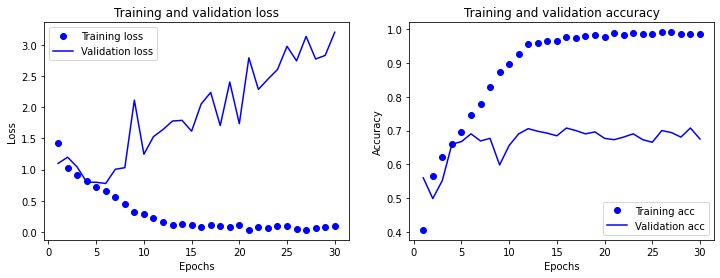

In [10]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    acc = history.history['acc'] #训练准确率
    val_acc = history.history['val_acc'] #验证准确率
    plt.subplot(1, 2, 2) #子图2
    plt.plot(epochs, acc, 'bo', label='Training acc') #训练准确率
    plt.plot(epochs, val_acc, 'b', label='Validation acc') #验证准确率
    plt.title('Training and validation accuracy') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Accuracy') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图
show_history(history) # 调用这个函数

这段代码定义了一个名为 `show_history` 的函数，用于显示训练过程中的学习曲线。这个函数可以帮助我们分析模型在训练过程中的性能，从而判断模型是否出现过拟合或欠拟合现象。函数接受一个名为 `history` 的参数，该参数包含了在训练过程中记录的损失值（loss）、验证损失值（val_loss）、准确率（acc）和验证准确率（val_acc）等信息。

在函数内部，首先我们提取了损失值、验证损失值、准确率和验证准确率等变量。接着，我们使用 matplotlib 绘制了一个 12x4 大小的图片，并在这个图片中绘制了两个子图：

1. 子图1：展示训练损失值（loss）和验证损失值（val_loss）随训练轮次（epochs）的变化趋势。
   - 在子图1中，我们分别绘制了训练损失值（loss）和验证损失值（val_loss）曲线。训练损失值用蓝色圆点表示，验证损失值用蓝色实线表示。

2. 子图2：展示训练准确率（acc）和验证准确率（val_acc）随训练轮次（epochs）的变化趋势。
   - 在子图2中，我们分别绘制了训练准确率（acc）和验证准确率（val_acc）曲线。训练准确率用蓝色圆点表示，验证准确率用蓝色实线表示。

最后，我们调用 `show_history` 函数，并将训练过程中的信息对象 `history` 作为参数传递。这将绘制并显示学习曲线。

通过观察这些曲线图，我们可以分析训练过程中的模型性能。例如，如果验证损失值在某一轮次后开始上升，那么可能出现了过拟合现象；如果训练损失值和验证损失值始终降不下来，可能出现了欠拟合现象。根据这些信息，我们可以调整模型参数和结构，以优化模型的性能。

---

观察到训练集的损失呈下降趋势，但测试集上的损失却出现跳跃。这表明神经网络性能不稳定，可能存在过拟合问题。在接下来的讲解中，我们将探讨如何优化神经网络以降低损失值并提高准确率。

In [11]:
result = cnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('CNN的测试准确率为',"{0:.2f}%".format(result[1]))

21/21 [==============================] - 5s 239ms/step - loss: 2.8781 - acc: 0.6631
CNN的测试准确率为 0.66%


这段代码使用 `cnn.evaluate()` 函数评估模型在测试集（X_test 和 y_test，即图像数据和对应的分类标签）上的性能。`cnn.evaluate()` 函数会计算模型的损失值（loss）和准确率（accuracy）等指标，并以列表形式返回这些指标。

`result = cnn.evaluate(X_test, y_test)` 这行代码会得到一个包含两个元素的列表：列表的第一个元素（`result[0]`）表示测试集上的损失值，第二个元素（`result[1]`）表示测试集上的准确率。

然后，我们使用 `print` 函数输出模型在测试集上的准确率。格式化字符串 `"{0:.2f}%"` 会将准确率保留两位小数，并添加百分号。例如，如果准确率为 0.9876，输出结果将为 "98.76%"。

这个测试准确率实际上可以告诉我们模型在未见过的数据（测试集）上的预测性能。通过观察这个准确率，我们可以了解模型的泛化能力以及有无过拟合或欠拟合的问题。

In [12]:
prediction = cnn.predict(X_test) #预测测试集的图片分类

In [13]:
prediction[0] #第一张图片的分类

array([3.5945944e-09, 1.1853230e-05, 6.1022576e-10, 9.9998820e-01],
      dtype=float32)

In [14]:
print('第一张测试图片的分类结果为:', np.argmax(prediction[0]))

第一张测试图片的分类结果为: 3
